In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


from keras import *
from keras.layers import *

In [ ]:
from sklearn.preprocessing import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

#Importing the database

Latin1 is a character encoding that covers characters used in Western European languages and is a good choice when dealing with text data that includes special characters. If you're facing decoding issues with UTF-8, using latin1 as the encoding when reading files might help resolve those problems.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spam Filter Ml/spam.csv',encoding='latin1')

In [ ]:
#Fetches 5 rows
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2261,ham,Did you show him and wot did he say or could u...,NaN,NaN,NaN
5100,ham,"Aight, call me once you're close",NaN,NaN,NaN
4494,ham,Hope this text meets you smiling. If not then ...,NaN,NaN,NaN
2075,ham,Must come later.. I normally bathe him in da a...,NaN,NaN,NaN
2484,ham,Only if you promise your getting out as SOON a...,NaN,NaN,NaN


In [ ]:
df.shape
#(total columns ,total rows)

(5572, 5)

#1. Data Cleaning
Modifying the dataset  like removing empty columns,duplicates

In [ ]:
#info about our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Droping/deleting columns permanant

In [ ]:
#droping/deleting columns permanant
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
3329,ham,Send me yetty's number pls.
4222,ham,Stupid auto correct on my phone
249,spam,Congratulations ur awarded 500 of CD vouchers ...
2861,spam,Adult 18 Content Your video will be with you s...
1709,ham,U meet other fren dun wan meet me ah... Muz b ...


Renaming columns

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

####Label Encoding
is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.



In [ ]:
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()
#0 for not spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Checking null values

In [ ]:
df.isnull().sum()

Checking for duplicates and removing them

In [ ]:
df.duplicated().sum()

In [ ]:
df=df.drop_duplicates(keep='first')

#2. Exploratory Data Analysis(EDA)
collecting insights about data

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Showng percentage of spam , not spam in pie chart

In [ ]:
import matplotlib.pyplot as plt

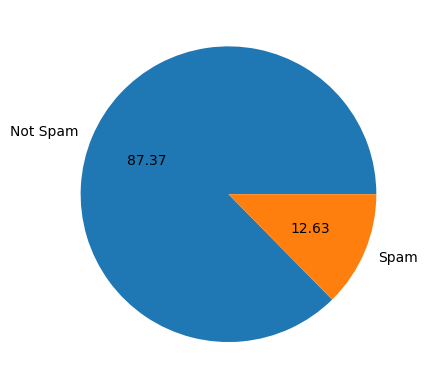

In [ ]:
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

#Data is imbalannced by looking at pie

We count no of alphabets,words,sentences in each sms and analyze that

**punkt** tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

**Changeable**

In [ ]:
# Natural Language Toolkit
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Create 3 columns fors alphabets,words and Sentences

In [ ]:
#column for no of characters in  sms
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


word_tokenizer breaks the sms into words

In [ ]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

#len(....) counts the no of elemenents or words


In [ ]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

#len(....) counts the no of elemenents or words


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#Give details of the columns

df[['num_words','num_words','num_sentences']].describe()

,num_words,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.455794,18.455794,1.965564
std,13.324758,13.324758,1.448541
min,1.000000,1.000000,1.000000
25%,9.000000,9.000000,1.000000
50%,15.000000,15.000000,1.000000
75%,26.000000,26.000000,2.000000
max,220.000000,220.000000,38.000000


Analyzing Spam (1) and not Spam(0) msgs separately

In [ ]:
#Not Spam
df[df['target']==0][['num_words','num_words','num_sentences']].describe()

,num_words,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.123782,17.123782,1.820195
std,13.493970,13.493970,1.383657
min,1.000000,1.000000,1.000000
25%,8.000000,8.000000,1.000000
50%,13.000000,13.000000,1.000000
75%,22.000000,22.000000,2.000000
max,220.000000,220.000000,38.000000


In [ ]:
#Spam
df[df['target']==1][['num_words','num_words','num_sentences']].describe()

,num_words,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,27.667688,2.970904
std,7.008418,7.008418,1.488425
min,2.000000,2.000000,1.000000
25%,25.000000,25.000000,2.000000
50%,29.000000,29.000000,3.000000
75%,32.000000,32.000000,4.000000
max,46.000000,46.000000,9.000000


Using histogram to see the difference in no of sentences for Spam and not spam

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
1152,0,Ok i go change also...,22,6,1
2275,0,Is that on the telly? No its Brdget Jones!,42,11,2
3312,0,"Huh... Hyde park not in mel ah, opps, got conf...",113,30,2
2487,0,K ill drink.pa then what doing. I need srs mod...,78,20,2
3538,0,What happen dear. Why you silent. I am tensed,45,11,3
798,0,Ok i msg u b4 i leave my house.,31,10,1
3740,1,2/2 146tf150p,13,2,1
1958,0,"Lol ... Oh no babe, I wont be sliding into you...",95,21,1
1732,0,"K, can that happen tonight?",27,7,1
3894,0,Yes. Last practice,19,4,2


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

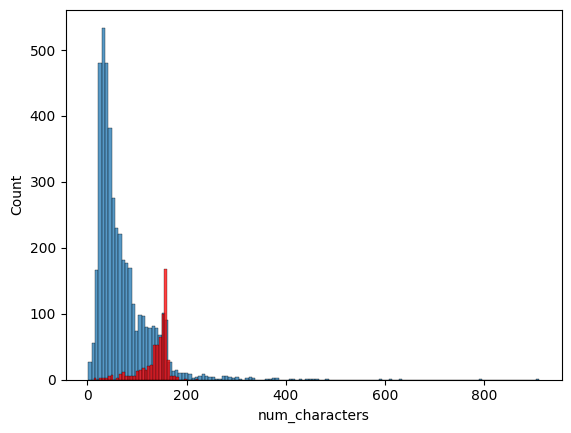

In [ ]:
#alphabets
sns.histplot(df[df['target']==0]['num_characters'])#not spam
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')#spam


<Axes: xlabel='num_words', ylabel='Count'>

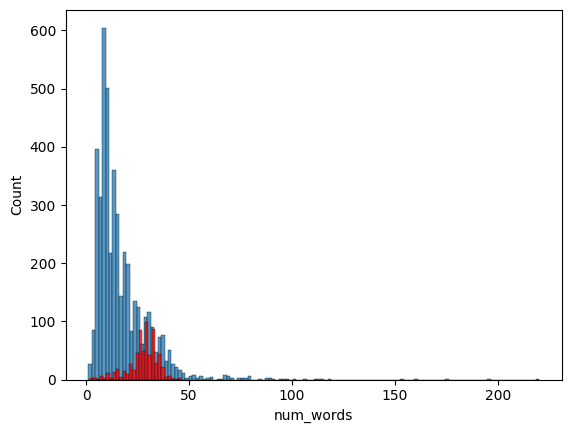

In [ ]:
#words
sns.histplot(df[df['target']==0]['num_words'])#not spam
sns.histplot(df[df['target']==1]['num_words'],color = 'red')#spam


<Axes: xlabel='num_sentences', ylabel='Count'>

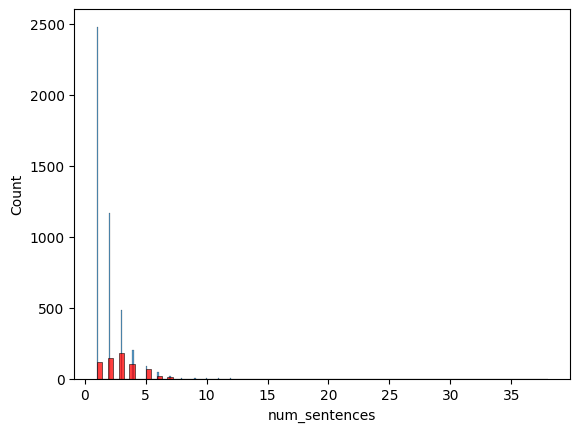

In [ ]:
#sentences
sns.histplot(df[df['target']==0]['num_sentences'])#not spam
sns.histplot(df[df['target']==1]['num_sentences'],color = 'red')#spam

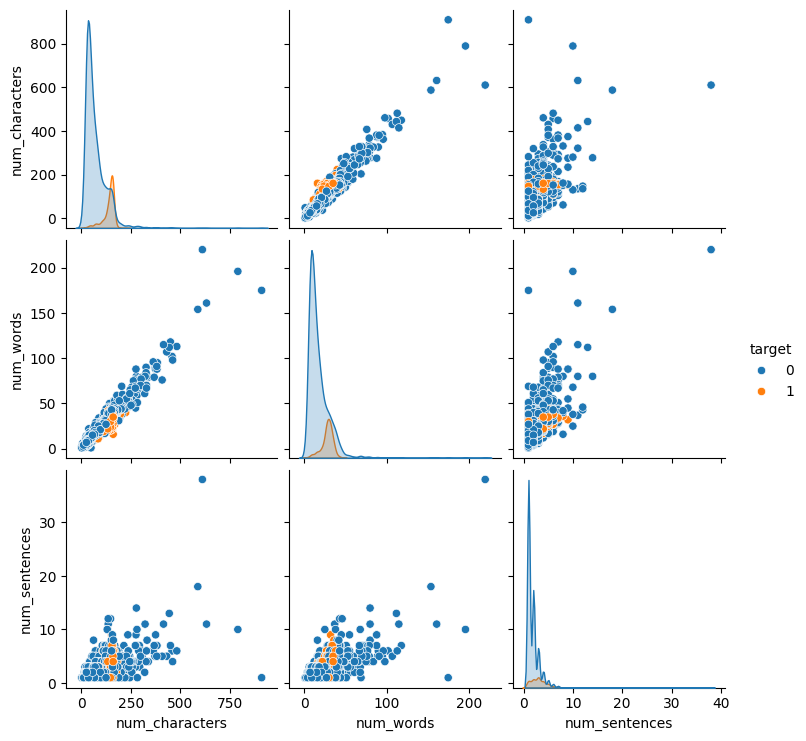

In [ ]:
sns.pairplot(df,hue='target')

###Finding Correalation Coefficient
The correlation coefficient is a statistical concept which helps in establishing a relation between predicted and actual values obtained in a statistical experiment. The calculated value of the correlation coefficient explains the exactness between the predicted and actual values.

<ipython-input-37-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

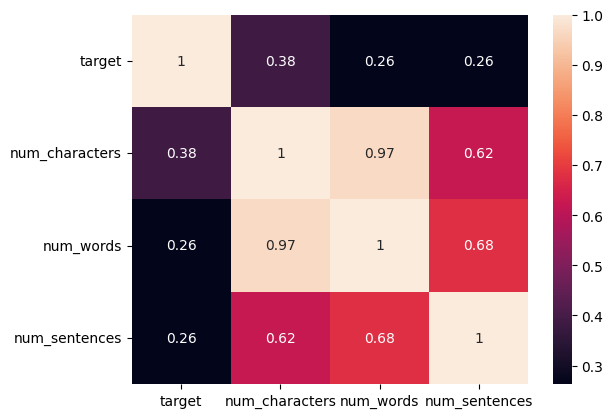

In [ ]:
sns.heatmap(df.corr(),annot=True)

We choose num_characters of ar 0.38

#3. Data Preprocessing


1.   LowerCase
2.   Tokenization
3.   Removing Special Caracters
4.   Removing stop words and punctuations - pronouns,is was , its etc
5.   Stemming - converting words like run running etc to onw word






####Removing stop words & punctutations func use

In [ ]:
from nltk.corpus import *
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

####Stemming func

In [ ]:
from nltk.stem import *
ps = PorterStemmer()

#converts to root word
ps.stem('loving')
ps.stem('dancing')

'danc'

####Doing all above procresses together

In [ ]:

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  #Removing Special Characters ; text is a array now
  for i in text:
    if i.isalnum():
      y.append(i)

#copying values of y to text and emptying y
  text=y[:]
  y.clear()


  #Removing stop words & punctutations
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)



Demo

In [ ]:
transform_text('Hey sexy buns ! Have I told you ? I adore you, loverboy. I hope you remember to thank your sister in law for those meatballs *grins* ... i love you, babe')

'hey sexi bun told ador loverboy hope rememb thank sister law meatbal grin love babe'

Putting transform text into a new column

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


####Word cloud
is a data visualization that displays the most frequent words in a text. The size of each word represents its frequency. Word clouds can be used to analyze text data and identify trends and patterns.

In [ ]:
from wordcloud import *

In [ ]:
wc =WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [ ]:
#working on spam mss
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

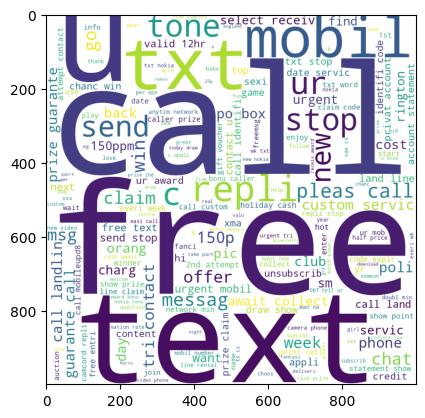

In [ ]:
plt.imshow(spam_wc)

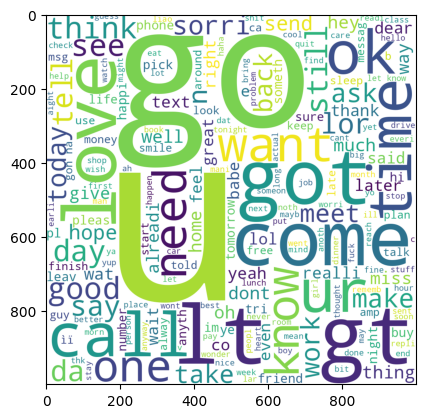

In [ ]:
#working on not spam sms
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

####Top 30 words in spam
The split() method splits a string into a list.

You can specify the separator, default separator is any whitespace.

In [ ]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



###DataFrame
is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

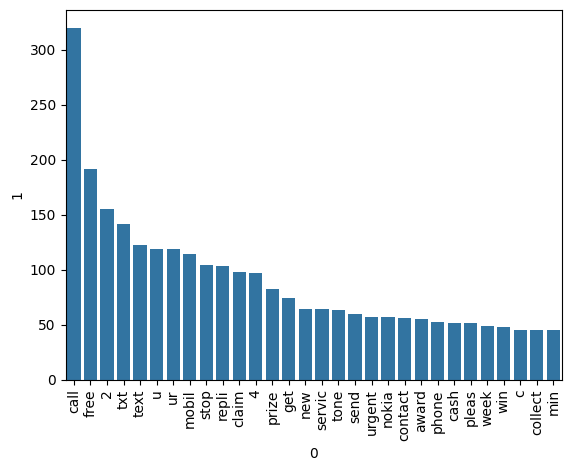

In [ ]:
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
    )

plt.xticks(rotation='vertical')
plt.show()

Doing same for ham

In [ ]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

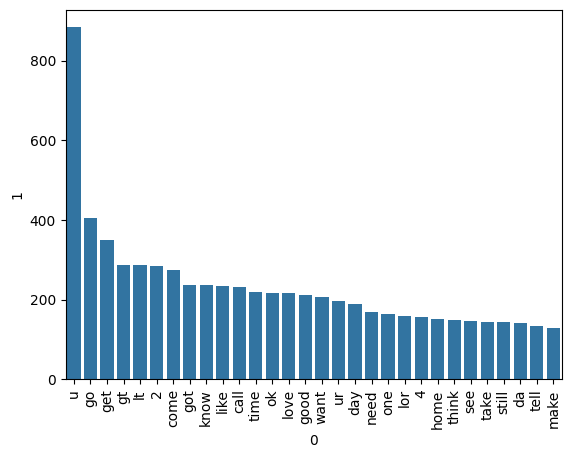

In [ ]:
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
    )

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#4. Model Building

####For vectorizing text we start with bag of number(coursera course 2) and as input put in  naive bayes algo

In [ ]:
from sklearn.feature_extraction.text import *

In [ ]:
import sklearn as sk

####TfidfVectorizer
is a tool that converts a collection of raw documents into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a statistical method used in machine learning and information retrieval to measure the importance of a term in a document relative to a collection of documents

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

#1000 words to be vectorized

In [ ]:
cv = CountVectorizer()

####Supervised learning taking input X

In [ ]:
#Converting sparse array to dense array

#X =cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

#do compareision later


In [ ]:
X
X.shape

(5169, 3000)

Taking labeled output y

In [ ]:
y =df['target'].values
len(y)

5169

In [ ]:
from sklearn.model_selection import *

In [ ]:
#20% of the data to be used in test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

####Implementing naive bayees

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

####Gauss

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In machine learning, model fitting is a measurement of how well a model adapts to data that is similar to the data it was trained on.


In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)


In [ ]:
len(y_pred1)

1034

In [ ]:
len(y_test)


1034

In [ ]:
print("accuracy score: "+str(accuracy_score(y_test, y_pred1)))

accuracy score: 0.8694390715667312


In [ ]:
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred1))
print(" ")
print("precision_score "+str(precision_score(y_test, y_pred1)))

confusion_matrix
[[788 108]
 [ 27 111]]
 
precision_score 0.5068493150684932


In [ ]:
print(len(y_test))
print(len(y_train))
X.shape

1034
4135


(5169, 3000)

####Multinomial

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)


In [ ]:
print("accuracy score: "+str(accuracy_score(y_test, y_pred2)))

accuracy score: 0.9709864603481625


In [ ]:
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred2))
print(" ")
print("precision_score "+str(precision_score(y_test, y_pred2)))



confusion_matrix
[[896   0]
 [ 30 108]]
 
precision_score 1.0


#### Bernouli

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)


In [ ]:
print("accuracy score: "+str(accuracy_score(y_test, y_pred3)))

accuracy score: 0.9835589941972921


In [ ]:
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred3))
print(" ")
print("precision_score "+str(precision_score(y_test, y_pred3)))

confusion_matrix
[[895   1]
 [ 16 122]]
 
precision_score 0.991869918699187


We choose Multinomial Naive Bayees because prescision score is 1

Other methods used

1.   Voting clasifier
2.   Scaling
3. Weighting
4. Stacking
5. Appending no of characters to X

They were not useful for our work

#5.Linking to a website

creating a pipeline

 In Python, the **pickle module** allows users to serialize and deserialize Python objects, including trained machine learning models. This means that users can save a trained model and reuse it to make predictions on new data without having to retrain the model

 Array

In [ ]:
import pickle
#wb write binary

#saving var tfdidf to ,say, file where file is object of open('vectorizer.pkl','wb')
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

pickle.dump(mnb,open('model.pkl','wb'))